In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics
from math import sqrt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.read_csv('result.csv')
# df = df.fillna(0)


rows_drop = []
for index, row in df.iterrows():
    if row[2:].isnull().sum()/len(row[2:]) > 0.5:
        rows_drop.append(index)
df = df.drop(rows_drop, axis=0)

features = list(df.columns.values)
features.remove('region_name')
features.remove('date')
for feature in features:
    df[feature] = df[feature].fillna(df[feature].mean())
region = df.region_name.unique()

def split_region(i):
    # val_state = np.array(3*[region[i], 3*region[i+1],3* region[i+2]])
    val_state = region[i]
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

def cross_val(neigh,typ):
    score_list_cv = []
    
    if typ == "region":
        for i in range(0,5):
            train, val = split_region(i)
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
    
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return np.average(score_list_cv)
    
    elif typ == "time":
            # if i == 0:
            train = df.loc[df['date'] < '2020-08-10']
            val = df.loc[df['date'] >= '2020-08-10']
            # else:
                # train = df.loc[df['date'] >= '2020-08-10']
                # val = df.loc[df['date'] < '2020-08-10']
            
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
        
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
            return np.average(score_list_cv)     
    return 0


['Alaska' 'Montana' 'North Dakota' 'South Dakota' 'Vermont' 'Wyoming']


In [2]:
score_list = []
for k in range(1,20):
    score_list.append(cross_val(KNN(k),"region"))


In [3]:
print(min(score_list))
print(score_list)

30.23465126681652
[34.17568468375674, 31.102722780980866, 30.667862059668607, 30.554913863005993, 30.513117880376512, 30.368662086184365, 30.23465126681652, 30.355190605240455, 30.367979853345055, 30.669496222426865, 30.50715496285959, 30.658072041663935, 30.504134587687464, 30.383071267268654, 30.497733432170172, 30.29040287662618, 30.435384142663708, 30.33917963521107, 30.337825851849185]


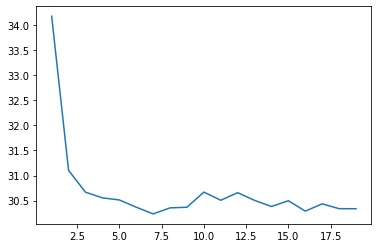

In [4]:
plt.plot(range(1,20),score_list)

28.947966205651415
[28.947966205651415, 30.372582940386934, 34.94654095541654, 37.426070151960246, 32.91634682940675, 35.858061526242835, 35.48130810957748, 33.80069500608445, 38.11931319045042, 32.564946905449936, 33.22767543689616, 33.40931021548688, 33.40931021548688, 33.40931021548688, 33.40931021548688, 33.40931021548688, 33.40931021548688]


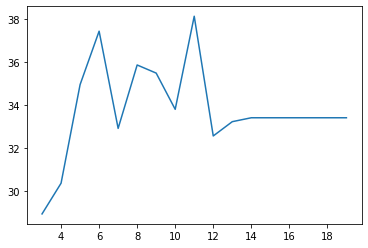

In [5]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"region"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

36.203050055669806
[38.82895182721264, 37.492221415470524, 36.59801021711224, 36.39525495628975, 36.203050055669806, 36.78806450215633, 36.87513980141838, 37.598572702575204, 37.73577457966872, 37.927235706459456, 38.254080248352366, 38.20038463908543, 37.80429628434103, 37.5774412964448, 37.82608349528923, 37.97493198130018, 38.15269830719649, 38.23791465658072, 38.418665060398496]


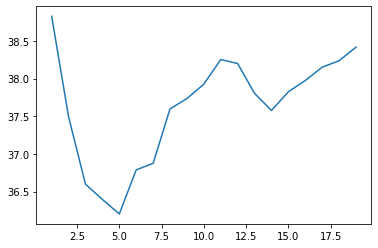

In [6]:
score_list = []
for k in range(1,20):
    score_list.append(cross_val(KNN(k),"time"))

print(min(score_list))
print(score_list)
plt.plot(range(1,20),score_list)

37.2572653808972
[38.38815378577416, 40.406850104589836, 40.23150585178005, 39.54174781338644, 38.72127229427266, 38.250231457394314, 37.2572653808972, 40.25786025734602, 40.30795644634764, 41.03997486642794, 38.10764632371479, 40.43564846353607, 39.93425586719586, 38.44964239105482, 38.44964239105482, 38.44964239105482, 38.44964239105482]


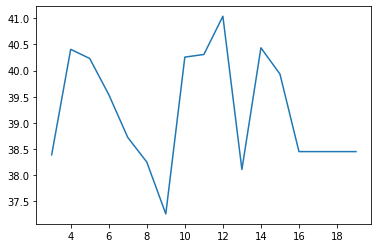

In [7]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"time"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

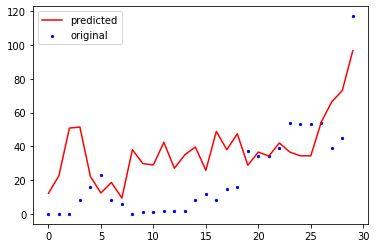

In [8]:
knn = KNN(5)

train, val = split_region(1)
knn.fit(train.iloc[:,3:-1], train.iloc[:,-1])
pred = knn.predict(val.iloc[:,3:-1])
plt.scatter(range(len(val.iloc[:,-1])), val.iloc[:,-1], s=5, color="blue", label="original")
plt.plot(range(len(val.iloc[:,-1])), pred, color="red", label="predicted")
plt.legend()
plt.show()